<a href="https://colab.research.google.com/github/Sisterno/ML_RedesNeuronales/blob/master/IT05/Modelo_entrenamiento__IT05_try02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from time import time
import pathlib
 
path_img_leucocitos = "/content/drive/MyDrive/ML/04-dataset-preprocesado-fusion";
pathlib_img_leucocitos=pathlib.Path(path_img_leucocitos)
 
from google.colab import drive
drive.mount('/content/drive')
 
# batch_size = 32
batch_size = 32
img_height = 180
img_width = 180
 
#-------------------------------------------------------------------------------
class TimingCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time()
    def on_epoch_end(self, batch, logs={}):
        self.times.append(time() - self.epoch_time_start)
#-------------------------------------------------------------------------------
 
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  path_img_leucocitos,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)
 
AUTOTUNE = tf.data.AUTOTUNE
 
# train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

Mounted at /content/drive
Found 59877 files belonging to 5 classes.
Using 47902 files for training.
Found 59877 files belonging to 5 classes.
Using 11975 files for validation.


## Modelo DS002-I05-D001

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D001 = TimingCallback()
num_classes = 5

model_I05_D001 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I05_D001.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D001.summary()

epochs=35
history_I05_D001 = model_I05_D001.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D001]
)

#-------------------------------------------------------------------------------

Epoch 1/35
1497/1497 [==============================] - 174s 115ms/step - loss: 2.1915 - accuracy: 0.3380 - val_loss: 1.1849 - val_accuracy: 0.5023
Epoch 2/35
1497/1497 [==============================] - 173s 115ms/step - loss: 1.0433 - accuracy: 0.5329 - val_loss: 0.9497 - val_accuracy: 0.5621
Epoch 3/35
1497/1497 [==============================] - 174s 116ms/step - loss: 0.9203 - accuracy: 0.5724 - val_loss: 0.8148 - val_accuracy: 0.6589
Epoch 4/35
1497/1497 [==============================] - 174s 116ms/step - loss: 0.7405 - accuracy: 0.6840 - val_loss: 0.6727 - val_accuracy: 0.7294
Epoch 5/35
1497/1497 [==============================] - 174s 116ms/step - loss: 0.6012 - accuracy: 0.7492 - val_loss: 0.5416 - val_accuracy: 0.7840
Epoch 6/35
1497/1497 [==============================] - 174s 116ms/step - loss: 0.4996 - accuracy: 0.7942 - val_loss: 0.4733 - val_accuracy: 0.8128
Epoch 7/35
1497/1497 [==============================] - 174s 116ms/step - loss: 0.4258 - accuracy: 0.8283 - val_

[173.59356784820557, 173.251544713974, 174.0141589641571, 173.6815905570984, 173.7010533809662, 174.1722354888916, 174.24408316612244, 174.43636894226074, 173.33790683746338, 171.84903192520142, 172.93855595588684, 172.04607844352722, 173.4788522720337, 172.46358704566956, 173.11134147644043, 173.54787349700928, 173.43970322608948, 174.05828499794006, 173.90205192565918, 174.47603464126587, 174.40096426010132, 174.54089832305908, 174.70061206817627, 174.97472214698792, 174.4889485836029, 175.66658639907837, 175.55096817016602, 175.28349494934082, 175.0800211429596, 175.39658665657043, 174.13738918304443, 173.8574275970459, 174.67253971099854, 175.76313948631287, 175.04146003723145]
El entrenamiento se demoro: 6093.299664020538 segundos
El entrenamiento se demoro: 101.55499440034231 minutos
accuracy => 0.9553672075271606
loss => 0.1275392770767212
val_accuracy => 0.9101461172103882
val_loss => 0.2471509724855423


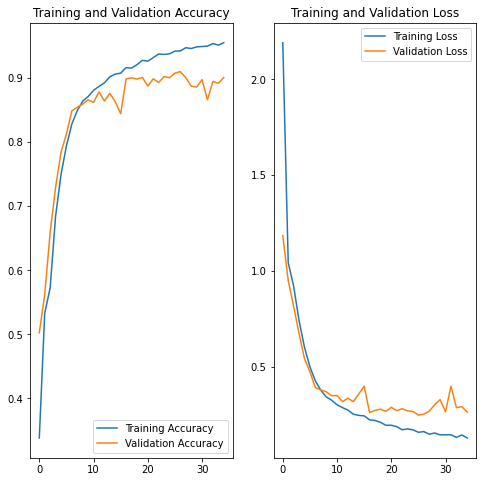

In [ ]:
#-------------------------------------------------------------------------------
print(cb_I05_D001.times)
final_time = 0
for time in cb_I05_D001.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D001.history['accuracy'])))
print('loss => '+ str(min(history_I05_D001.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D001.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D001.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D001.history['accuracy']
val_acc = history_I05_D001.history['val_accuracy']

loss=history_I05_D001.history['loss']
val_loss=history_I05_D001.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D002

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D002 = TimingCallback()
num_classes = 10

model_I05_D002 = Sequential([
  # layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model_I05_D002.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D002.summary()

epochs=35
history_I05_D002 = model_I05_D002.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D002]
)

#-------------------------------------------------------------------------------

Epoch 1/35
1497/1497 [==============================] - 181s 120ms/step - loss: 5.6444 - accuracy: 0.4193 - val_loss: 1.0797 - val_accuracy: 0.5488
Epoch 2/35
1497/1497 [==============================] - 180s 120ms/step - loss: 0.7998 - accuracy: 0.6733 - val_loss: 0.6188 - val_accuracy: 0.7528
Epoch 3/35
1497/1497 [==============================] - 181s 120ms/step - loss: 0.4884 - accuracy: 0.8108 - val_loss: 0.4491 - val_accuracy: 0.8238
Epoch 4/35
1497/1497 [==============================] - 179s 119ms/step - loss: 0.3634 - accuracy: 0.8596 - val_loss: 0.3696 - val_accuracy: 0.8579
Epoch 5/35
1497/1497 [==============================] - 180s 120ms/step - loss: 0.3113 - accuracy: 0.8816 - val_loss: 0.2895 - val_accuracy: 0.8933
Epoch 6/35
1497/1497 [==============================] - 180s 120ms/step - loss: 0.2765 - accuracy: 0.8954 - val_loss: 0.3415 - val_accuracy: 0.8662
Epoch 7/35
1497/1497 [==============================] - 180s 120ms/step - loss: 0.2427 - accuracy: 0.9112 - val_

[181.1568305492401, 180.0853099822998, 180.5088722705841, 179.31010699272156, 180.0816924571991, 180.07029509544373, 179.75956797599792, 180.23517847061157, 181.12211894989014, 181.0860240459442, 181.30338835716248, 182.11207795143127, 181.77026891708374, 182.20096349716187, 181.997239112854, 181.56919813156128, 182.52670192718506, 180.82199120521545, 180.26116490364075, 181.94424295425415, 181.5417971611023, 180.76920533180237, 179.5120325088501, 180.59204411506653, 179.96914505958557, 181.6999945640564, 182.97246432304382, 182.11493229866028, 182.30769324302673, 181.9156458377838, 180.33254766464233, 182.40612697601318, 183.0206916332245, 181.9187467098236, 182.02147698402405]
El entrenamiento se demoro: 6343.017778158188 segundos
El entrenamiento se demoro: 105.71696296930313 minutos
accuracy => 0.9739885330200195
loss => 0.08853059262037277
val_accuracy => 0.9494780898094177
val_loss => 0.1820204257965088


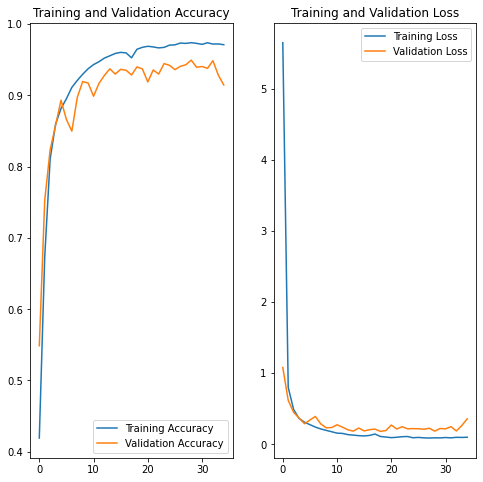

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D002.times)
final_time = 0
for time in cb_I05_D002.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D002.history['accuracy'])))
print('loss => '+ str(min(history_I05_D002.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D002.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D002.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D002.history['accuracy']
val_acc = history_I05_D002.history['val_accuracy']

loss=history_I05_D002.history['loss']
val_loss=history_I05_D002.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D003

In [2]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D003 = TimingCallback()
num_classes = 5
epochs=20
 
model_I05_D003 = Sequential([
  layers.Conv2D(8, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])
model_I05_D003.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D003.summary()
 
 
history_I05_D003 = model_I05_D003.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D003]
)
 
#-------------------------------------------------------------------------------

Epoch 1/20
1497/1497 [==============================] - 6389s 4s/step - loss: 8.9984 - accuracy: 0.4662 - val_loss: 1.2908 - val_accuracy: 0.4671
Epoch 2/20
1497/1497 [==============================] - 171s 114ms/step - loss: 1.0166 - accuracy: 0.5892 - val_loss: 1.0702 - val_accuracy: 0.5301
Epoch 3/20
1497/1497 [==============================] - 170s 113ms/step - loss: 0.8884 - accuracy: 0.6414 - val_loss: 0.9623 - val_accuracy: 0.5708
Epoch 4/20
1497/1497 [==============================] - 169s 112ms/step - loss: 0.7645 - accuracy: 0.7075 - val_loss: 0.8305 - val_accuracy: 0.6777
Epoch 5/20
1497/1497 [==============================] - 169s 113ms/step - loss: 0.6473 - accuracy: 0.7659 - val_loss: 0.6207 - val_accuracy: 0.7734
Epoch 6/20
1497/1497 [==============================] - 168s 112ms/step - loss: 0.5628 - accuracy: 0.7941 - val_loss: 0.7039 - val_accuracy: 0.7266
Epoch 7/20
1497/1497 [==============================] - 169s 113ms/step - loss: 0.4949 - accuracy: 0.8180 - val_lo

[6388.816676616669, 170.7235565185547, 169.6944501399994, 168.68910264968872, 169.21381974220276, 168.21527361869812, 169.3847439289093, 168.67113184928894, 169.3633406162262, 169.58221983909607, 168.68983602523804, 169.920166015625, 168.3325231075287, 167.14094829559326, 169.10096955299377, 169.49911880493164, 170.52636528015137, 170.49395513534546, 169.98218488693237, 170.22771906852722]
El entrenamiento se demoro: 9606.2681016922 segundos
El entrenamiento se demoro: 160.10446836153668 minutos
accuracy => 0.9440524578094482
loss => 0.16926556825637817
val_accuracy => 0.8839248418807983
val_loss => 0.34533244371414185


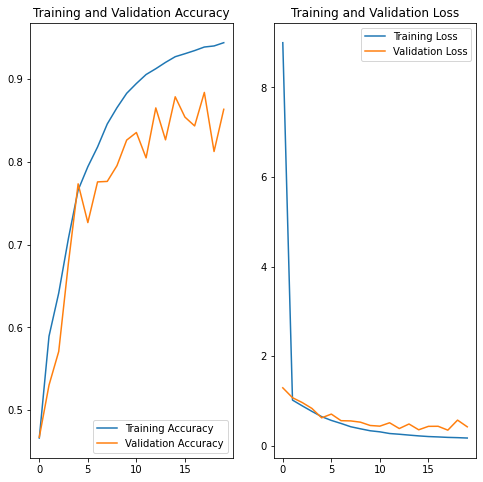

In [3]:
#-------------------------------------------------------------------------------

print(cb_I05_D003.times)
final_time = 0
for time in cb_I05_D003.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D003.history['accuracy'])))
print('loss => '+ str(min(history_I05_D003.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D003.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D003.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D003.history['accuracy']
val_acc = history_I05_D003.history['val_accuracy']

loss=history_I05_D003.history['loss']
val_loss=history_I05_D003.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D004

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D004 = TimingCallback()
num_classes = 10

model_I05_D004 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.0001)),
  layers.Dense(num_classes)

])
model_I05_D004.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D004.summary()

epochs=35
history_I05_D004 = model_I05_D004.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D004]
)

#-------------------------------------------------------------------------------

Epoch 1/35
1497/1497 [==============================] - 182s 121ms/step - loss: 4.8842 - accuracy: 0.5596 - val_loss: 0.9448 - val_accuracy: 0.6579
Epoch 2/35
1497/1497 [==============================] - 182s 121ms/step - loss: 0.6474 - accuracy: 0.7927 - val_loss: 0.6540 - val_accuracy: 0.8159
Epoch 3/35
1497/1497 [==============================] - 182s 121ms/step - loss: 0.5037 - accuracy: 0.8555 - val_loss: 0.5384 - val_accuracy: 0.8564
Epoch 4/35
1497/1497 [==============================] - 181s 121ms/step - loss: 0.4450 - accuracy: 0.8814 - val_loss: 0.5534 - val_accuracy: 0.8452
Epoch 5/35
1497/1497 [==============================] - 182s 121ms/step - loss: 0.4143 - accuracy: 0.8979 - val_loss: 0.4422 - val_accuracy: 0.8893
Epoch 6/35
1497/1497 [==============================] - 182s 121ms/step - loss: 0.3848 - accuracy: 0.9114 - val_loss: 0.4411 - val_accuracy: 0.9011
Epoch 7/35
1497/1497 [==============================] - 181s 121ms/step - loss: 0.3669 - accuracy: 0.9219 - val_

[182.48998379707336, 181.94298362731934, 182.1146879196167, 181.17990279197693, 181.60385394096375, 181.51178979873657, 181.27113604545593, 181.42034268379211, 181.35282444953918, 182.1989860534668, 180.79821252822876, 181.2189474105835, 182.13879990577698, 181.56676864624023, 181.49530386924744, 181.4790072441101, 182.56381011009216, 182.40624499320984, 181.928879737854, 182.1664433479309, 181.98388147354126, 181.98899793624878, 181.22492504119873, 182.932630777359, 183.02004766464233, 182.2530117034912, 181.81004095077515, 181.56115436553955, 181.93394875526428, 182.54342579841614, 183.27523565292358, 182.28174328804016, 181.75736045837402, 182.82248044013977, 182.131267786026]
El entrenamiento se demoro: 6368.369060993195 segundos
El entrenamiento se demoro: 106.13948434988657 minutos
accuracy => 0.9649492502212524
loss => 0.261823445558548
val_accuracy => 0.9496451020240784
val_loss => 0.3138541579246521


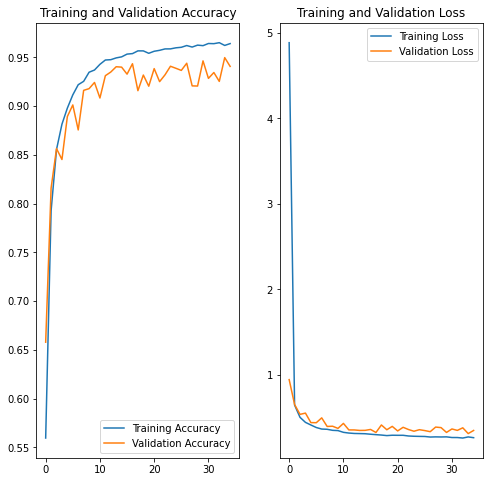

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D004.times)
final_time = 0
for time in cb_I05_D004.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D004.history['accuracy'])))
print('loss => '+ str(min(history_I05_D004.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D004.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D004.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D004.history['accuracy']
val_acc = history_I05_D004.history['val_accuracy']

loss=history_I05_D004.history['loss']
val_loss=history_I05_D004.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D005

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D005 = TimingCallback()
num_classes = 10

model_I05_D005 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I05_D005.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D005.summary()

epochs=15
history_I05_D005 = model_I05_D005.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D005]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 185s 122ms/step - loss: 6.3444 - accuracy: 0.5621 - val_loss: 2.0850 - val_accuracy: 0.7298
Epoch 2/15
1497/1497 [==============================] - 182s 121ms/step - loss: 1.6429 - accuracy: 0.7653 - val_loss: 1.2869 - val_accuracy: 0.8018
Epoch 3/15
1497/1497 [==============================] - 182s 121ms/step - loss: 1.1238 - accuracy: 0.8082 - val_loss: 1.0011 - val_accuracy: 0.8227
Epoch 4/15
1497/1497 [==============================] - 184s 122ms/step - loss: 0.9100 - accuracy: 0.8223 - val_loss: 0.8038 - val_accuracy: 0.8473
Epoch 5/15
1497/1497 [==============================] - 183s 122ms/step - loss: 0.7809 - accuracy: 0.8363 - val_loss: 0.7307 - val_accuracy: 0.8535
Epoch 6/15
1497/1497 [==============================] - 183s 122ms/step - loss: 0.6964 - accuracy: 0.8473 - val_loss: 0.6313 - val_accuracy: 0.8615
Epoch 7/15
1497/1497 [==============================] - 183s 122ms/step - loss: 0.6437 - accuracy: 0.8568 - val_

[184.58842754364014, 182.3827121257782, 181.86666750907898, 183.8134388923645, 182.66971826553345, 183.3260235786438, 182.60309600830078, 183.57047319412231, 182.22532558441162, 182.71296310424805, 183.4082100391388, 183.07164096832275, 182.5925645828247, 182.35257077217102, 184.08114671707153]
El entrenamiento se demoro: 2745.2649788856506 segundos
El entrenamiento se demoro: 45.754416314760846 minutos
accuracy => 0.8852866291999817
loss => 0.545698881149292
val_accuracy => 0.8982880711555481
val_loss => 0.5186147689819336


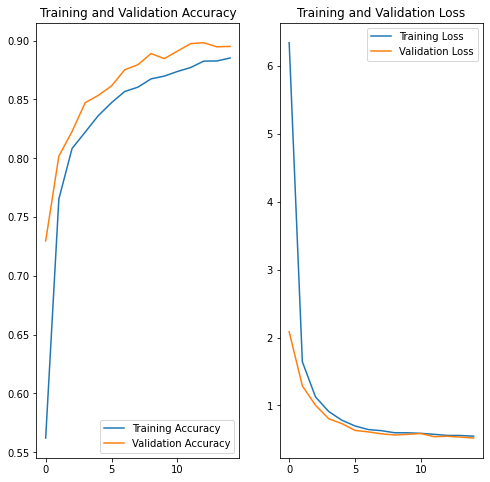

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D005.times)
final_time = 0
for time in cb_I05_D005.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D005.history['accuracy'])))
print('loss => '+ str(min(history_I05_D005.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D005.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D005.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D005.history['accuracy']
val_acc = history_I05_D005.history['val_accuracy']

loss=history_I05_D005.history['loss']
val_loss=history_I05_D005.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D006

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D006 = TimingCallback()
num_classes = 10

model_I05_D006 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)

])
model_I05_D006.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D006.summary()

epochs=15
history_I05_D006 = model_I05_D006.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D006]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 182s 121ms/step - loss: 3.7912 - accuracy: 0.6765 - val_loss: 0.7317 - val_accuracy: 0.7820
Epoch 2/15
1497/1497 [==============================] - 181s 121ms/step - loss: 0.4997 - accuracy: 0.8083 - val_loss: 0.6429 - val_accuracy: 0.8036
Epoch 3/15
1497/1497 [==============================] - 182s 121ms/step - loss: 0.4361 - accuracy: 0.8358 - val_loss: 0.4378 - val_accuracy: 0.8337
Epoch 4/15
1497/1497 [==============================] - 181s 121ms/step - loss: 0.3590 - accuracy: 0.8658 - val_loss: 0.3570 - val_accuracy: 0.8771
Epoch 5/15
1497/1497 [==============================] - 182s 121ms/step - loss: 0.3083 - accuracy: 0.8878 - val_loss: 0.3806 - val_accuracy: 0.8601
Epoch 6/15
1497/1497 [==============================] - 182s 121ms/step - loss: 0.2426 - accuracy: 0.9110 - val_loss: 0.2442 - val_accuracy: 0.9171
Epoch 7/15
1497/1497 [==============================] - 182s 121ms/step - loss: 0.2200 - accuracy: 0.9203 - val_

[182.44082355499268, 181.13568496704102, 181.6119523048401, 181.37702655792236, 181.80605554580688, 182.14946174621582, 182.4658966064453, 181.99137544631958, 182.8747477531433, 181.8715431690216, 182.49640369415283, 182.31592440605164, 182.24317717552185, 181.9935622215271, 181.75752973556519]
El entrenamiento se demoro: 2730.5311648845673 segundos
El entrenamiento se demoro: 45.50885274807612 minutos
accuracy => 0.9640933275222778
loss => 0.10921653360128403
val_accuracy => 0.946889340877533
val_loss => 0.16587671637535095


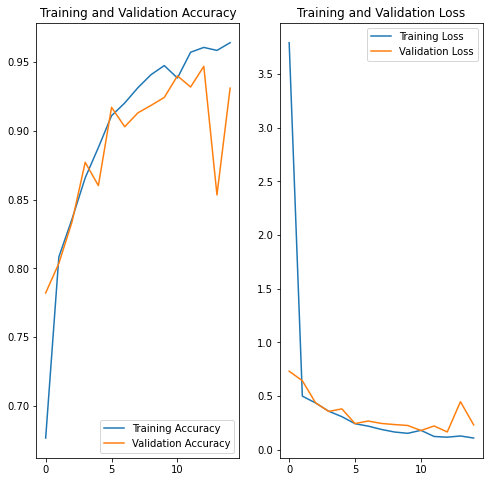

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D006.times)
final_time = 0
for time in cb_I05_D006.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D006.history['accuracy'])))
print('loss => '+ str(min(history_I05_D006.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D006.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D006.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D006.history['accuracy']
val_acc = history_I05_D006.history['val_accuracy']

loss=history_I05_D006.history['loss']
val_loss=history_I05_D006.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D007

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D007 = TimingCallback()
num_classes = 10

model_I05_D007 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I05_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D007.summary()

epochs=15
history_I05_D007 = model_I05_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 182s 121ms/step - loss: 7.7131 - accuracy: 0.5707 - val_loss: 1.8394 - val_accuracy: 0.7687
Epoch 2/15
1497/1497 [==============================] - 181s 121ms/step - loss: 1.4546 - accuracy: 0.7836 - val_loss: 1.1879 - val_accuracy: 0.8085
Epoch 3/15
1497/1497 [==============================] - 180s 120ms/step - loss: 0.9818 - accuracy: 0.8268 - val_loss: 0.8331 - val_accuracy: 0.8672
Epoch 4/15
1497/1497 [==============================] - 180s 120ms/step - loss: 0.8120 - accuracy: 0.8493 - val_loss: 0.7153 - val_accuracy: 0.8792
Epoch 5/15
1497/1497 [==============================] - 180s 120ms/step - loss: 0.7274 - accuracy: 0.8591 - val_loss: 0.7005 - val_accuracy: 0.8771
Epoch 6/15
1497/1497 [==============================] - 179s 119ms/step - loss: 0.7057 - accuracy: 0.8637 - val_loss: 0.6670 - val_accuracy: 0.8747
Epoch 7/15
1497/1497 [==============================] - 181s 120ms/step - loss: 0.6911 - accuracy: 0.8628 - val_

[182.08596181869507, 181.00778722763062, 179.8448131084442, 180.31482529640198, 179.51941919326782, 179.42829155921936, 180.87154483795166, 180.82084441184998, 180.44402050971985, 180.86721301078796, 180.14517307281494, 180.76299571990967, 179.90610885620117, 179.91269493103027, 178.26577591896057]
El entrenamiento se demoro: 2704.197469472885 segundos
El entrenamiento se demoro: 45.069957824548084 minutos
accuracy => 0.8887937664985657
loss => 0.5485543608665466
val_accuracy => 0.9096450805664062
val_loss => 0.4952952563762665


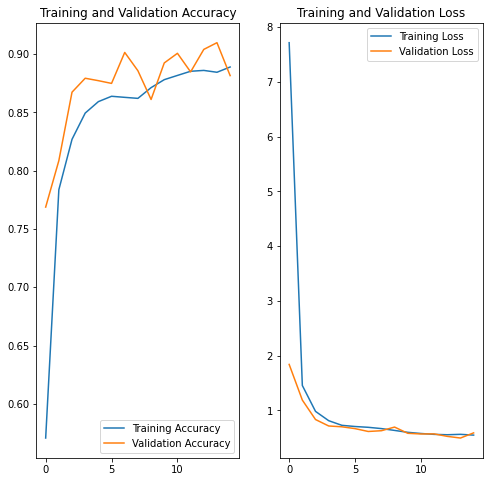

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D007.times)
final_time = 0
for time in cb_I05_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D007.history['accuracy'])))
print('loss => '+ str(min(history_I05_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D007.history['accuracy']
val_acc = history_I05_D007.history['val_accuracy']

loss=history_I05_D007.history['loss']
val_loss=history_I05_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D007 try02

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D007 = TimingCallback()
num_classes = 10

model_I05_D007 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  layers.Dense(num_classes)

])
model_I05_D007.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D007.summary()

epochs=15
history_I05_D007 = model_I05_D007.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D007]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 179s 118ms/step - loss: 7.3500 - accuracy: 0.6797 - val_loss: 2.4489 - val_accuracy: 0.7035
Epoch 2/15
1497/1497 [==============================] - 179s 119ms/step - loss: 1.6747 - accuracy: 0.7946 - val_loss: 1.4271 - val_accuracy: 0.8044
Epoch 3/15
1497/1497 [==============================] - 180s 120ms/step - loss: 1.1450 - accuracy: 0.8308 - val_loss: 1.0233 - val_accuracy: 0.8253
Epoch 4/15
1497/1497 [==============================] - 179s 119ms/step - loss: 0.9078 - accuracy: 0.8568 - val_loss: 0.9070 - val_accuracy: 0.8526
Epoch 5/15
1497/1497 [==============================] - 178s 119ms/step - loss: 0.8345 - accuracy: 0.8667 - val_loss: 0.8533 - val_accuracy: 0.8426
Epoch 6/15
1497/1497 [==============================] - 179s 119ms/step - loss: 0.8135 - accuracy: 0.8721 - val_loss: 0.8361 - val_accuracy: 0.8833
Epoch 7/15
1497/1497 [==============================] - 179s 119ms/step - loss: 0.8045 - accuracy: 0.8708 - val_

[178.51696467399597, 178.7274706363678, 179.80771827697754, 179.4537901878357, 178.24180150032043, 179.35432386398315, 179.49370002746582, 179.96341943740845, 178.60327768325806, 178.43360090255737, 178.39792656898499, 174.51583003997803, 174.3270547389984, 173.63133430480957, 173.55405950546265]
El entrenamiento se demoro: 2665.022272348404 segundos
El entrenamiento se demoro: 44.4170378724734 minutos
accuracy => 0.8980835676193237
loss => 0.6167914867401123
val_accuracy => 0.9139874577522278
val_loss => 0.5661240220069885


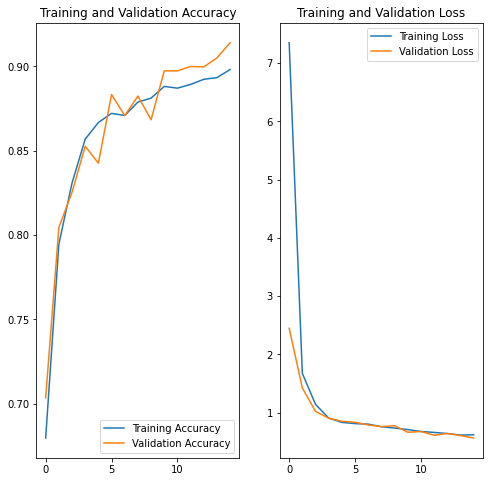

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D007.times)
final_time = 0
for time in cb_I05_D007.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D007.history['accuracy'])))
print('loss => '+ str(min(history_I05_D007.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D007.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D007.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D007.history['accuracy']
val_acc = history_I05_D007.history['val_accuracy']

loss=history_I05_D007.history['loss']
val_loss=history_I05_D007.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Modelo DS002-I05-D008

In [ ]:
from tensorflow.keras import regularizers
from time import time
#-------------------------------------------------------------------------------
cb_I05_D008 = TimingCallback()
num_classes = 10

model_I05_D008 = Sequential([
  layers.Conv2D (16, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.25),
  layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
  layers.Dense(num_classes)

])
model_I05_D008.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# model_I05_D008.summary()

epochs=15
history_I05_D008 = model_I05_D008.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[cb_I05_D008]
)

#-------------------------------------------------------------------------------

Epoch 1/15
1497/1497 [==============================] - 180s 119ms/step - loss: 2.4412 - accuracy: 0.7286 - val_loss: 0.8947 - val_accuracy: 0.7921
Epoch 2/15
1497/1497 [==============================] - 177s 118ms/step - loss: 0.6745 - accuracy: 0.8517 - val_loss: 0.5968 - val_accuracy: 0.8821
Epoch 3/15
1497/1497 [==============================] - 178s 118ms/step - loss: 0.5648 - accuracy: 0.8790 - val_loss: 0.4969 - val_accuracy: 0.9076
Epoch 4/15
1497/1497 [==============================] - 178s 118ms/step - loss: 0.5139 - accuracy: 0.8962 - val_loss: 0.5342 - val_accuracy: 0.8904
Epoch 5/15
1497/1497 [==============================] - 177s 118ms/step - loss: 0.4897 - accuracy: 0.9065 - val_loss: 0.4889 - val_accuracy: 0.9032
Epoch 6/15
1497/1497 [==============================] - 179s 119ms/step - loss: 0.4702 - accuracy: 0.9142 - val_loss: 0.5235 - val_accuracy: 0.8909
Epoch 7/15
1497/1497 [==============================] - 179s 119ms/step - loss: 0.4668 - accuracy: 0.9177 - val_

In [ ]:
#-------------------------------------------------------------------------------

print(cb_I05_D008.times)
final_time = 0
for time in cb_I05_D008.times:
  final_time += time
print('El entrenamiento se demoro: ' +str(final_time)+' segundos')
final_time= final_time/60
print('El entrenamiento se demoro: ' +str(final_time)+' minutos')
print('accuracy => '+ str(max(history_I05_D008.history['accuracy'])))
print('loss => '+ str(min(history_I05_D008.history['loss'])))
print('val_accuracy => '+ str(max(history_I05_D008.history['val_accuracy'])))
print('val_loss => '+ str(min(history_I05_D008.history['val_loss'])))

#-------------------------------------------------------------------------------

acc = history_I05_D008.history['accuracy']
val_acc = history_I05_D008.history['val_accuracy']

loss=history_I05_D008.history['loss']
val_loss=history_I05_D008.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()